In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

#F mini ON

FMO_het = pd.read_csv('result_tables/FminiON_het.csv')
#FMO_het = FMO_het[(FMO_het['peak_FR'] != 0) & (~np.isnan(FMO_het['age']))]
FMO_homo = pd.read_csv('result_tables/FminiON_homo.csv')
#FMO_homo = FMO_homo[(FMO_homo['peak_FR'] != 0) & (~np.isnan(FMO_homo['age']))]
FMO_wt = pd.read_csv('result_tables/FminiON_wt.csv')
#FMO_wt = FMO_wt[(FMO_wt['peak_FR'] != 0) & (~np.isnan(FMO_wt['age']))]
FMO = pd.concat([FMO_wt, FMO_het, FMO_homo], ignore_index=True)

#UHD
UHD_wt = pd.read_csv('result_tables/UHD_WT.csv')
#UHD_wt = UHD_wt[(UHD_wt['peak_FR'] != 0) & (~np.isnan(UHD_wt['age']))]
UHD_het = pd.read_csv('result_tables/UHD_het.csv')
#UHD_het = UHD_het[(UHD_het['peak_FR'] != 0) & (~np.isnan(UHD_het['age']))]
UHD_homo = pd.read_csv('result_tables/UHD_homo.csv')
#UHD_homo = UHD_homo[(UHD_homo['peak_FR'] != 0) & (~np.isnan(UHD_homo['age']))]
UHD = pd.concat([UHD_wt, UHD_het, UHD_homo], ignore_index=True)

#HD1
HD1_wt = pd.read_csv('result_tables/HD1_WT.csv')
#HD1_wt = HD1_wt[(HD1_wt['peak_FR'] != 0) & (~np.isnan(HD1_wt['age']))]
HD1_het = pd.read_csv('result_tables/HD1_het.csv')
#HD1_het = HD1_het[(HD1_het['peak_FR'] != 0) & (~np.isnan(HD1_het['age']))]
HD1_homo = pd.read_csv('result_tables/HD1_homo.csv')
#HD1_homo = HD1_homo[(HD1_homo['peak_FR'] != 0) & (~np.isnan(HD1_homo['age']))]
HD1 = pd.concat([HD1_wt, HD1_het, HD1_homo], ignore_index=True)

#HD2
HD2_wt = pd.read_csv('result_tables/HD2_WT.csv')
HD2_het = pd.read_csv('result_tables/HD2_het.csv')
HD2_homo = pd.read_csv('result_tables/HD2_homo.csv')
HD2 = pd.concat([HD2_wt,HD2_het, HD2_homo], ignore_index=True)

#OF trans SMrf
OFFtranssmrf_wt = pd.read_csv('result_tables/OFFtranssmrf_WT.csv')
OFFtranssmrf_het = pd.read_csv('result_tables/OFFtranssmrf_het.csv')
OFFtranssmrf_homo = pd.read_csv('result_tables/OFFtranssmrf_homo.csv')
OFFtranssmrf = pd.concat([OFFtranssmrf_wt,OFFtranssmrf_het, OFFtranssmrf_homo], ignore_index=True)

#ON alpha
OA_wt = pd.read_csv('result_tables/ONalpha_WT.csv')
OA_wt = OA_wt[(OA_wt['peak_FR'] != 0) & (~np.isnan(OA_wt['age']))]
OA_het = pd.read_csv('result_tables/ONalpha_het.csv')
OA_het = OA_het[(OA_het['peak_FR'] != 0) & (~np.isnan(OA_het['age']))]
OA_homo = pd.read_csv('result_tables/ONalpha_homo.csv')
OA_homo = OA_homo[(OA_homo['peak_FR'] != 0) & (~np.isnan(OA_homo['age']))]
OA = pd.concat([OA_wt,OA_het, OA_homo], ignore_index=True)

#OFF sus alpa
OFFsAlpha_wt = pd.read_csv('result_tables/OFFsAlpha_WT.csv')
OFFsAlpha_wt = OFFsAlpha_wt[(OFFsAlpha_wt['peak_FR'] != 0) & (~np.isnan(OFFsAlpha_wt['age']))]
OFFsAlpha_het = pd.read_csv('result_tables/OFFsAlpha_het.csv')

OFFsAlpha_homo = pd.read_csv('result_tables/OFFsAlpha_homo.csv')
OFFsAlpha = pd.concat([OFFsAlpha_wt,OFFsAlpha_het, OFFsAlpha_homo], ignore_index=True)

##LEDs and F mini OFF are missing


In [67]:
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
def lme(celltype, response):
    model = mixedlm(f"{response}~ age * genotype", celltype, groups=celltype["animal_id"])
    result = model.fit()    
    print(result.summary())
    return result

lme(FMO, 'peak_FR')

                        Mixed Linear Model Regression Results
Model:                      MixedLM           Dependent Variable:           peak_FR  
No. Observations:           84                Method:                       REML     
No. Groups:                 36                Scale:                        4330.1073
Min. group size:            1                 Log-Likelihood:               -465.2819
Max. group size:            9                 Converged:                    Yes      
Mean group size:            2.3                                                      
-------------------------------------------------------------------------------------
                                       Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
-------------------------------------------------------------------------------------
Intercept                              359.885   35.828 10.045 0.000  289.662 430.107
genotype[T.Trarg1(Tusc5-eGFP/WT)]     -140.629   91.399 -1.539 0.124 -319.769 

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def scatter_peak_FR_age(df_wt, df_homo, df_het, celltype, ylabel, title):
    
    n_wt = df_wt['age'].notnull().sum()
    plt.scatter(df_wt['age'], df_wt[ylabel], c='grey', label=f'WT (n={n_wt})')
    plt.scatter(df_homo['age'], df_homo[ylabel], c='darkgreen', label=f'Tusc5 -/- (n={len(df_homo)})')
    plt.scatter(df_het['age'], df_het[ylabel], c='lightgreen', label=f'Tusc5 +/- (n={len(df_het)})')

    # Regression line and confidence interval for df_homo using seaborn
    sns.regplot(x='age', y=ylabel, data=df_homo, scatter=False, color='darkgreen')
    sns.regplot(x='age', y=ylabel, data=df_wt, scatter=False, color='gray')
    

    # Show legend outside the plot on the top right corner
    plt.legend(loc='best', prop={'size': 6})

    # Add total number of cells
    total_cells = df_wt.shape[0] + df_homo.shape[0] + df_het.shape[0]
    #plt.text(1.40, 1.05, f"Total cells n= {total_cells}", ha='right', va='top', transform=plt.gca().transAxes)

    plt.xlabel('Age (weeks)')
    plt.ylabel(title)
    plt.ylim(0,500)
    plt.title(f'{celltype} n= {total_cells}', fontweight='bold')
  
    plt.show()

# Example usage
# scatter_peak_FR_age(df_wt, df_homo, df_het, 'Some Cell Type', 'Peak Firing Rate', 'Peak Firing Rate')




In [69]:
#Adding sex
'''
def scatter_peak_FR_age(df_wt, df_homo, df_het, celltype, ylabel):
    plt.figure(figsize=(8, 6))
    n_wt = df_wt['age'].notnull().sum()
    plt.scatter(df_wt[df_wt['sex']=='Male']['age'], df_wt[df_wt['sex']=='Male'][ylabel], c='grey', label=f'WT Male (n={df_wt[df_wt["sex"]=="Male"].shape[0]})', marker='x')
    plt.scatter(df_wt[df_wt['sex']=='Female']['age'], df_wt[df_wt['sex']=='Female'][ylabel], c='grey', label=f'WT Female (n={df_wt[df_wt["sex"]=="Female"].shape[0]})', marker='^')
    plt.scatter(df_homo[df_homo['sex']=='Male']['age'], df_homo[df_homo['sex']=='Male'][ylabel], c='darkgreen', label=f'Tusc5 -/- Male (n={df_homo[df_homo["sex"]=="Male"].shape[0]})', marker='x')
    plt.scatter(df_homo[df_homo['sex']=='Female']['age'], df_homo[df_homo['sex']=='Female'][ylabel], c='darkgreen', label=f'Tusc5 -/- Female (n={df_homo[df_homo["sex"]=="Female"].shape[0]})', marker='^')
    plt.scatter(df_het[df_het['sex']=='Male']['age'], df_het[df_het['sex']=='Male'][ylabel], c='lightgreen', label=f'Tusc5 +/- Male (n={df_het[df_het["sex"]=="Male"].shape[0]})', marker='x')
    plt.scatter(df_het[df_het['sex']=='Female']['age'], df_het[df_het['sex']=='Female'][ylabel], c='lightgreen', label=f'Tusc5 +/- Female (n={df_het[df_het["sex"]=="Female"].shape[0]})', marker='^')

    # Add labels and title
    plt.xlabel('Age (weeks)')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} count vs Age {celltype}')

    # Show legend outside the plot on the top right corner
    plt.legend(loc='upper right', bbox_to_anchor=(1.40, 1))

    # Add total number of cells
    total_cells = df_wt.shape[0] + df_homo.shape[0] + df_het.shape[0]
    plt.text(0.95, 0.95, f"n = {total_cells}", ha='right', va='top', transform=plt.gca().transAxes)

    # Show plot
    plt.grid(True)
    plt.show()
'''


'\ndef scatter_peak_FR_age(df_wt, df_homo, df_het, celltype, ylabel):\n    plt.figure(figsize=(8, 6))\n    n_wt = df_wt[\'age\'].notnull().sum()\n    plt.scatter(df_wt[df_wt[\'sex\']==\'Male\'][\'age\'], df_wt[df_wt[\'sex\']==\'Male\'][ylabel], c=\'grey\', label=f\'WT Male (n={df_wt[df_wt["sex"]=="Male"].shape[0]})\', marker=\'x\')\n    plt.scatter(df_wt[df_wt[\'sex\']==\'Female\'][\'age\'], df_wt[df_wt[\'sex\']==\'Female\'][ylabel], c=\'grey\', label=f\'WT Female (n={df_wt[df_wt["sex"]=="Female"].shape[0]})\', marker=\'^\')\n    plt.scatter(df_homo[df_homo[\'sex\']==\'Male\'][\'age\'], df_homo[df_homo[\'sex\']==\'Male\'][ylabel], c=\'darkgreen\', label=f\'Tusc5 -/- Male (n={df_homo[df_homo["sex"]=="Male"].shape[0]})\', marker=\'x\')\n    plt.scatter(df_homo[df_homo[\'sex\']==\'Female\'][\'age\'], df_homo[df_homo[\'sex\']==\'Female\'][ylabel], c=\'darkgreen\', label=f\'Tusc5 -/- Female (n={df_homo[df_homo["sex"]=="Female"].shape[0]})\', marker=\'^\')\n    plt.scatter(df_het[df_het[\'se

In [70]:
'''
#Adding Regression to homos 
def scatter_peak_FR_age(df_wt, df_homo, df_het, celltype, ylabel):
    plt.figure(figsize=(8, 6))
    n_wt = df_wt['age'].notnull().sum()
    plt.scatter(df_wt[df_wt['sex']=='Male']['age'], df_wt[df_wt['sex']=='Male'][ylabel], c='grey', label=f'WT Male (n={df_wt[df_wt["sex"]=="Male"].shape[0]})', marker='x')
    plt.scatter(df_wt[df_wt['sex']=='Female']['age'], df_wt[df_wt['sex']=='Female'][ylabel], c='grey', label=f'WT Female (n={df_wt[df_wt["sex"]=="Female"].shape[0]})', marker='^')
    plt.scatter(df_het[df_het['sex']=='Male']['age'], df_het[df_het['sex']=='Male'][ylabel], c='lightgreen', label=f'Tusc5 +/- Male (n={df_het[df_het["sex"]=="Male"].shape[0]})', marker='x')
    plt.scatter(df_het[df_het['sex']=='Female']['age'], df_het[df_het['sex']=='Female'][ylabel], c='lightgreen', label=f'Tusc5 +/- Female (n={df_het[df_het["sex"]=="Female"].shape[0]})', marker='^')

    # Scatter plot for df_homo
    plt.scatter(df_homo[df_homo['sex']=='Male']['age'], df_homo[df_homo['sex']=='Male'][ylabel], c='darkgreen', label=f'Tusc5 -/- Male (n={df_homo[df_homo["sex"]=="Male"].shape[0]})', marker='x')
    plt.scatter(df_homo[df_homo['sex']=='Female']['age'], df_homo[df_homo['sex']=='Female'][ylabel], c='darkgreen', label=f'Tusc5 -/- Female (n={df_homo[df_homo["sex"]=="Female"].shape[0]})', marker='^')

    # Regression line and R-squared for df_homo
    df_homo_male = df_homo[df_homo['sex']=='Male']
    df_homo_female = df_homo[df_homo['sex']=='Female']
    df_homo_combined = pd.concat([df_homo_male, df_homo_female])

    x = df_homo_combined['age']
    y = df_homo_combined[ylabel]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    r_squared = r_value**2

    plt.plot(x, intercept + slope*x, color='darkgreen', label=f'Regression Line for Tusc5 -/- \n Age is the only predictor \n ($R^{2}$ = {r_squared:.2f})')

    # Add labels and title
    plt.xlabel('Age (weeks)')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs Age $\mathbf{{{celltype}}}$')

    # Show legend outside the plot on the top right corner
    plt.legend(loc='upper right', bbox_to_anchor=(1.42, 1.02))

    # Add total number of cells
    total_cells = df_wt.shape[0] + df_homo.shape[0] + df_het.shape[0]
    plt.text(1.40, 1.05, f"Total cells n= {total_cells}", ha='right', va='top', transform=plt.gca().transAxes)

    # Show plot
    plt.grid(True)
    plt.show()

'''

'\n#Adding Regression to homos \ndef scatter_peak_FR_age(df_wt, df_homo, df_het, celltype, ylabel):\n    plt.figure(figsize=(8, 6))\n    n_wt = df_wt[\'age\'].notnull().sum()\n    plt.scatter(df_wt[df_wt[\'sex\']==\'Male\'][\'age\'], df_wt[df_wt[\'sex\']==\'Male\'][ylabel], c=\'grey\', label=f\'WT Male (n={df_wt[df_wt["sex"]=="Male"].shape[0]})\', marker=\'x\')\n    plt.scatter(df_wt[df_wt[\'sex\']==\'Female\'][\'age\'], df_wt[df_wt[\'sex\']==\'Female\'][ylabel], c=\'grey\', label=f\'WT Female (n={df_wt[df_wt["sex"]=="Female"].shape[0]})\', marker=\'^\')\n    plt.scatter(df_het[df_het[\'sex\']==\'Male\'][\'age\'], df_het[df_het[\'sex\']==\'Male\'][ylabel], c=\'lightgreen\', label=f\'Tusc5 +/- Male (n={df_het[df_het["sex"]=="Male"].shape[0]})\', marker=\'x\')\n    plt.scatter(df_het[df_het[\'sex\']==\'Female\'][\'age\'], df_het[df_het[\'sex\']==\'Female\'][ylabel], c=\'lightgreen\', label=f\'Tusc5 +/- Female (n={df_het[df_het["sex"]=="Female"].shape[0]})\', marker=\'^\')\n\n    # Scatte

In [71]:
FMO_wt.columns

Index(['genotype', 'sex', 'age', 'which_eye', 'quadrant', 'cell_type',
       'animal_id', 'peak_FR', 'baseline_FR', 'min_spikes_ON',
       'min_spikes_OFF', 'min_size_ON', 'min_size_OFF', 'peak_size_ON',
       'peak_size_OFF', 'peak_spikes_ON', 'peak_spikes_OFF', 'half_peak_size',
       'SI'],
      dtype='object')

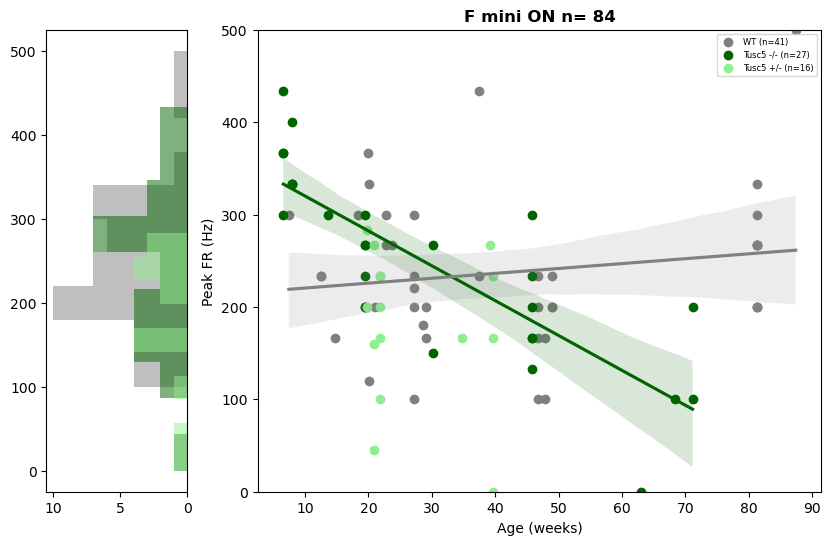

In [72]:
#fig, axs = plt.subplots(2,2,figsize=(10, 8), gridspec_kw={'height_ratios':[1,4], 'width_ratios':[1,4]})
fig, axs = plt.subplots(1,2,figsize=(10, 6), gridspec_kw={'width_ratios': [1, 4]})
axs = axs.flatten()
'''
axs[0].axis('off')
axs[1].hist(FMO_wt.age, alpha=.5, color= 'grey')
axs[1].hist(FMO_homo.age, alpha=.5, color= 'darkgreen')
axs[1].hist(FMO_het.age, alpha=.5, color = 'lightgreen')
'''
axs[0].hist(FMO_wt.peak_FR, alpha=.5, orientation='horizontal', color = 'grey')
axs[0].hist(FMO_homo.peak_FR, alpha=.5, orientation='horizontal', color = 'darkgreen')
axs[0].hist(FMO_het.peak_FR, alpha=.5, orientation='horizontal',  color = 'lightgreen')

axs[0].invert_xaxis()

plt.sca(axs[-1])
scatter_peak_FR_age(FMO_wt, FMO_homo, FMO_het, 'F mini ON', 'peak_FR', 'Peak FR (Hz)') 

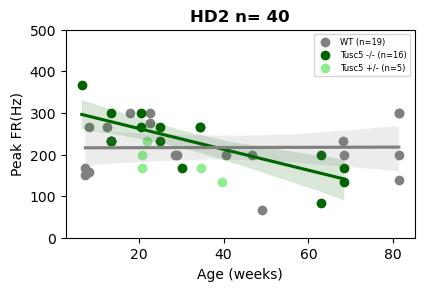

In [73]:
fig = plt.figure(figsize=(10*0.45, 6*0.45))
scatter_peak_FR_age(HD2_wt, HD2_homo, HD2_het, 'HD2', 'peak_FR', 'Peak FR(Hz)')

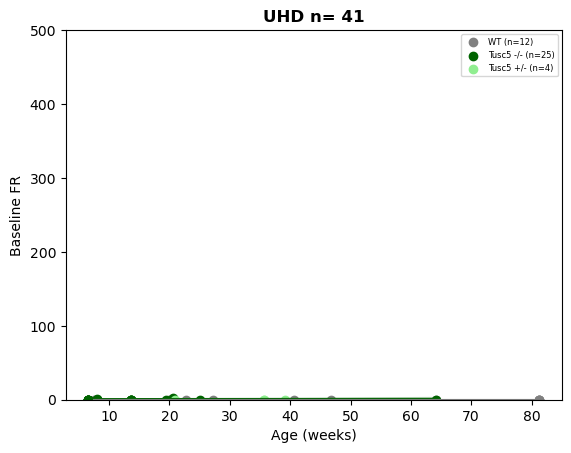

In [74]:
scatter_peak_FR_age(UHD_wt, UHD_homo, UHD_het, 'UHD', 'baseline_FR', 'Baseline FR')

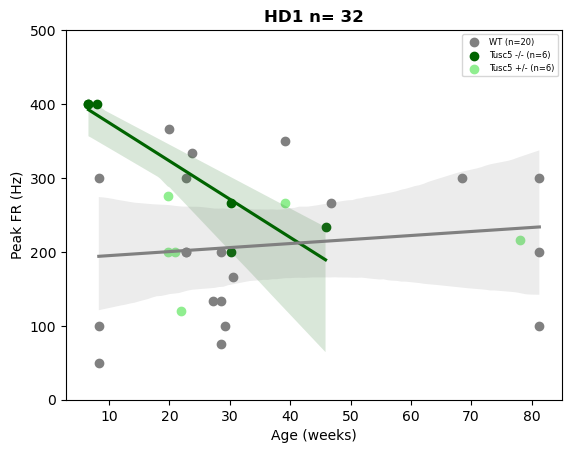

In [75]:
scatter_peak_FR_age(HD1_wt, HD1_homo, HD1_het, 'HD1', 'peak_FR', 'Peak FR (Hz)')

In [76]:
scatter_peak_FR_age(OA_wt, OA_homo, OA_het, 'ON Alpha', 'peak_FR')

TypeError: scatter_peak_FR_age() missing 1 required positional argument: 'title'

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


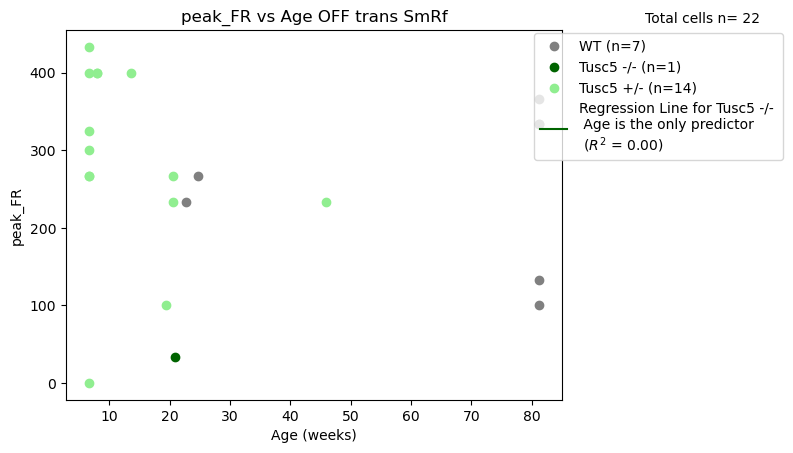

In [ ]:
scatter_peak_FR_age(OFFtranssmrf_wt, OFFtranssmrf_het, OFFtranssmrf_homo, 'OFF trans SmRf', 'peak_FR')

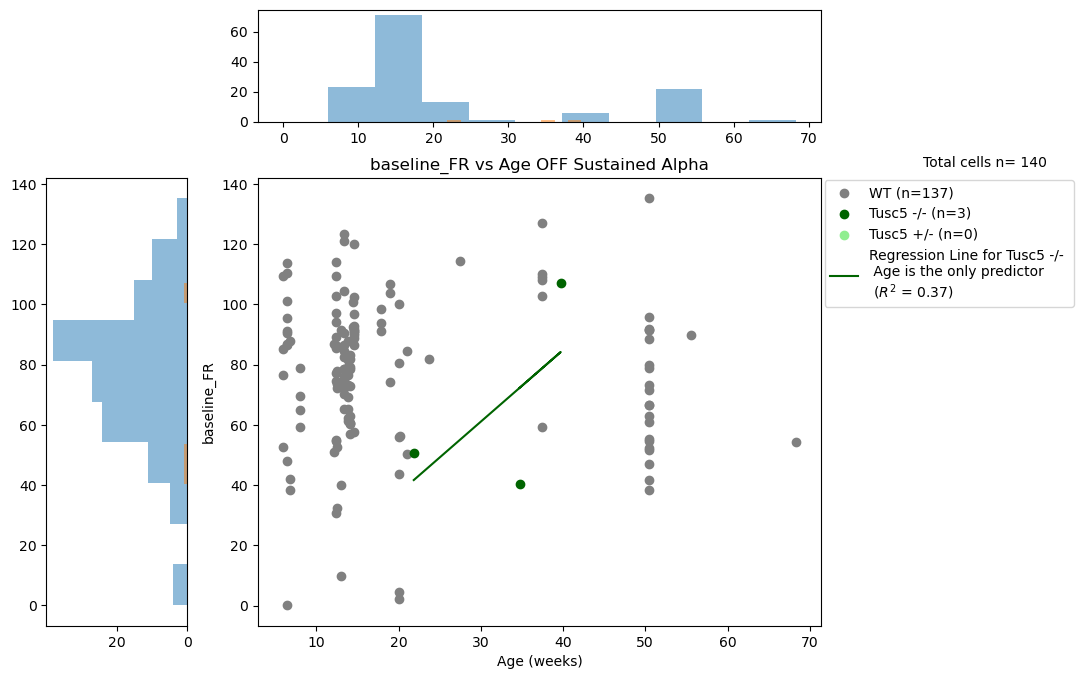

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(10, 8), gridspec_kw={'height_ratios':[1,4], 'width_ratios':[1,4]})
axs = axs.flatten()
axs[0].axis('off')
axs[1].hist(OFFsAlpha_wt.age, alpha=.5)
axs[1].hist(OFFsAlpha_het.age, alpha=.5)
axs[1].hist(OFFsAlpha_homo.age, alpha=.5)

axs[2].hist(OFFsAlpha_wt.baseline_FR, alpha=.5, orientation='horizontal')
axs[2].hist(OFFsAlpha_het.baseline_FR, alpha=.5, orientation='horizontal')
axs[2].hist(OFFsAlpha_homo.baseline_FR, alpha=.5, orientation='horizontal')

axs[2].invert_xaxis()

plt.sca(axs[-1])
scatter_peak_FR_age(OFFsAlpha_wt, OFFsAlpha_het, OFFsAlpha_homo, 'OFF Sustained Alpha', 'baseline_FR')